### Analysis of Diabetes Dataset - Allie Baker, Nik Mrdak

In [81]:
#Installed Libraries and Reading the Data File
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [82]:
data = pd.read_csv('diabetes_dataset00.csv')
#chunksize=8000

# Information About the Diabetes DataSet Columns
### The Diabetes Dataset contains 34 columns:
- Target: The type of diabetes or prediabetic condition. 
- Genetic Markers: Indicates whether specific genetic markers associated with diabetes are present. A "Positive" value means the genetic.
- Autoantibodies: Presence of autoantibodies. Often is associated with autoimmune diabetes. 
- Family History: Whether or not a family member has diabetes.
- Enviornmental Factors: Notes any environmental influences that might contribute to the development of diabetes.
- Insulin Levels: The insulin levels measured in the patient's blood measured in microunits per milliliter (µU/mL).
- Age: The age of the patient. 
- BMI: The body mass index of the patient, a measure of body fat based on height and weight.
- Physical Activity: The level of physical activity of the patient.
- Dietary Habits: Describes the patient's eating habits, "Healthy" or "Unhealthy."
- Blood Pressure: The blood pressure of the patient. 
- Cholesterol Levels: The level of cholesterol as milligrams (mg) of cholesterol per deciliter (dL) of blood. 
- Waist Circumference: Circumference of the patient's waist. 
- Blood Glucose Level: Amount of glucose in the blood. 
- Ethnicity: Measured as "Low Risk" or "High Risk". 
- Socioeconomic Factors: Measured as "Low", "Medium", or "High".
- Smoking Status: Measured as "Smoker" or "Non-Smoker"
- Alcohol Consumption: Measured as "Low", "Moderate", "High". 
- Glucose Tolerence Test: Measured as "Abnormal" or "Normal".
- History of PCOS: Measured as "True" or "False".
- Previous Gestational Diabetes: Measured as "True" or "False".
- Pregnancy History: Measured as "Normal" or "Complications".
- Weight Gain During Pregnancy: Measures the amount of weight gained during a pregnancy. 
- Pancreatic Health: Numerical value for the health of the patient's pancreas. 
- Pulmonary Function: Numerical vlaue for pulmonary functionality. 
- Cystic Fibrosis Diagnosis: Measured as "Ture" or "False".
- Steroid Use History: Measured as "Ture" or "False".
- Genetic Testing: Measured as "Positive" or "Negative".
- Neurological Assessments: Measured as "1", "2", or "3". 
- Liver Function Tests: Measured as "Normal" or "Abnormal".
- Digestive Enzyme Levels: Numerical value for the level of digestive enzymes of each patient. 
- Urine Test: Measured in "Normal", "Protein Present", "Ketones Present", or "Glucose Present".
- Birth Weight: Birth weight of patient in grams. 
- Early Onset Symptoms: Measured as "Ture" or "False".

### Analysis of the Dataset

In [80]:
#The first three rows of the dataset
data.head(6)

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No
5,LADA,Positive,Negative,Yes,Present,17,41,26,Moderate,Healthy,...,85,Yes,No,Negative,2,Normal,52,Ketones Present,3835,Yes


In [21]:
#Data analysis by discovering the datatypes of each column and for how many values in each column. 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

In [22]:
#Checking for null values
data.isna().sum().sort_values(ascending=False)

Target                           0
Cystic Fibrosis Diagnosis        0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Steroid Use History              0
Genetic Markers                  0
Genetic Testing                  0
Neurological Assessments         0
Liver Function Tests             0
Digestive Enzyme Levels          0
Urine Test                       0
Birth Weight                     0
Glucose Tolerance Test           0
Alcohol Consumption              0
Smoking Status                   0
Socioeconomic Factors            0
Ethnicity                        0
Blood Glucose Levels             0
Waist Circumference              0
Cholesterol Levels               0
Blood Pressure                   0
Dietary Habits                   0
Physical Activity                0
BMI                              0
Age                 

In [23]:
#Measuring shape of the dataset
data.shape
print(f'This dataset is {data.shape[0]} rows by {data.shape[1]} columns.')

This dataset is 70000 rows by 34 columns.


In [24]:
#Mathmatically describing the data. 
data.describe()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,21.607443,32.020700,24.782943,111.339543,194.867200,35.051657,160.701657,15.496414,47.564243,70.264671,1.804157,46.420529,3097.061071
std,10.785852,21.043173,6.014236,19.945000,44.532466,6.803461,48.165547,9.633096,19.984683,11.965600,0.680154,19.391089,713.837300
min,5.000000,0.000000,12.000000,60.000000,100.000000,20.000000,80.000000,0.000000,10.000000,30.000000,1.000000,10.000000,1500.000000
25%,13.000000,14.000000,20.000000,99.000000,163.000000,30.000000,121.000000,7.000000,32.000000,63.000000,1.000000,31.000000,2629.000000
50%,19.000000,31.000000,25.000000,113.000000,191.000000,34.000000,152.000000,16.000000,46.000000,72.000000,2.000000,48.000000,3103.000000
75%,28.000000,49.000000,29.000000,125.000000,225.000000,39.000000,194.000000,22.000000,64.000000,79.000000,2.000000,61.000000,3656.250000
max,49.000000,79.000000,39.000000,149.000000,299.000000,54.000000,299.000000,39.000000,99.000000,89.000000,3.000000,99.000000,4499.000000


## Exploratory Data Analysis

### Measuring the Correlation Between Multiple Health Indicatiors 

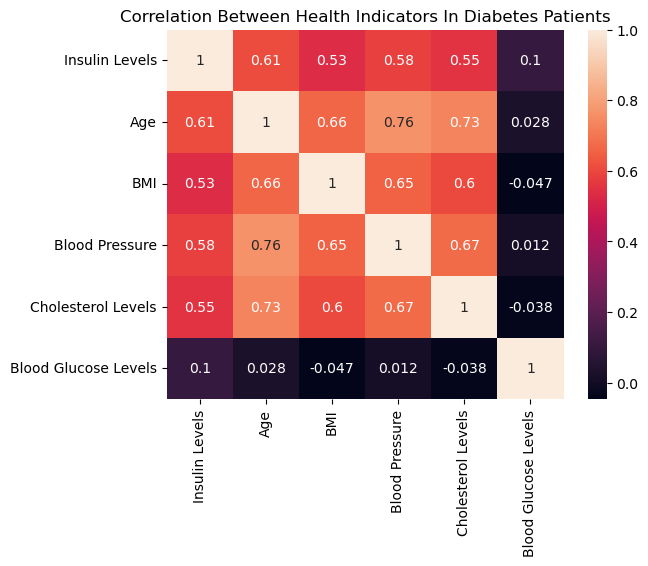

In [5]:
corr=data[['Insulin Levels','Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels', 'Blood Glucose Levels']].corr()

sns.heatmap(corr,annot=True)
plt.title('Correlation Between Health Indicators In Diabetes Patients')
plt.show()

### Amount of Insulin Categorized by Each Diabetic Condition

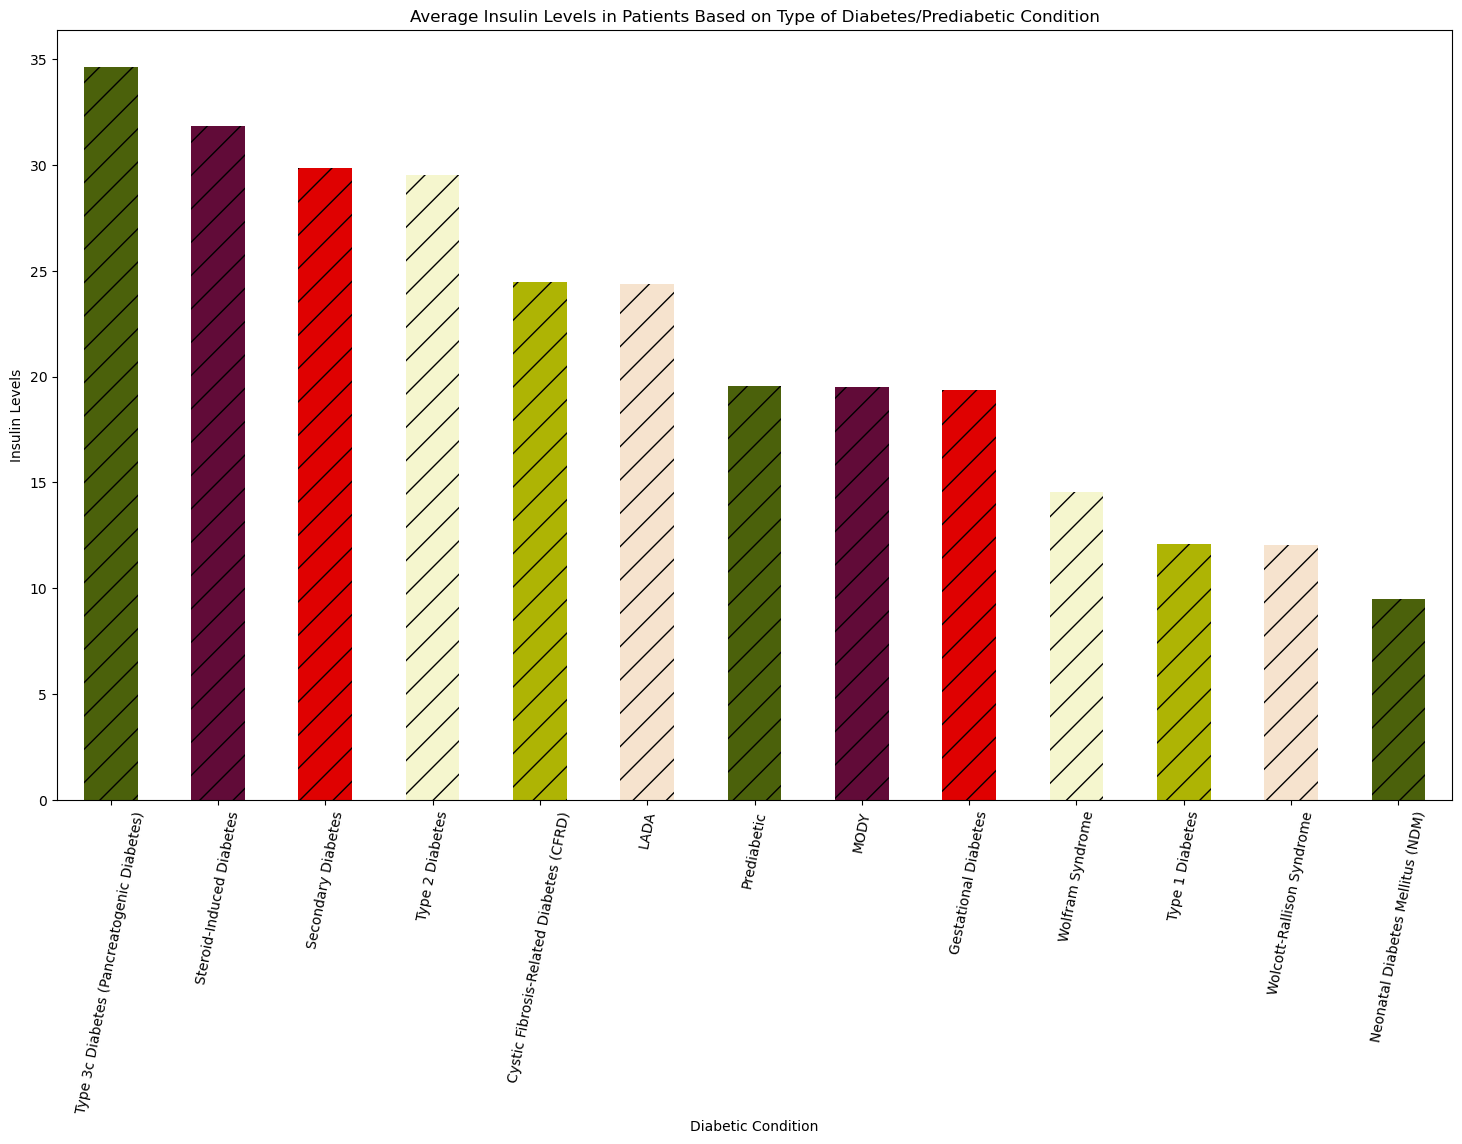

In [110]:
data.groupby(['Target'])['Insulin Levels'].mean().sort_values(ascending=False)\
.plot(kind='bar',figsize=(18,10),title="Average Insulin Levels in Patients Based on Type of Diabetes/Prediabetic Condition",\
color=['#4B610B','#610B38','#DF0101','#F5F6CE','#AEB404','#F6E3CE'], hatch='/')
plt.xlabel("Diabetic Condition")
plt.ylabel("Insulin Levels")
plt.xticks(rotation=79)
plt.show()

### Observations:
- From the heatmap, we can infer that there is a moderate positive correlation between all of the columns compared. The most notable correlation is with Age's strong correlation with all other factors. In addition, the only column with low correlation with the other categories is glucose level. This could be because glucose levels are more reguraly flucuating and more independent of the other health indicators.

- From the barplot, one notable connection we made is that the bottom four diabetic conditions are disease processes related to insufficient insulin secretion. In addition, the Prediabetes, MODY, and Gestational Diabetes columns, the insulin levels are equal on the graph. These three conditions do not use insulin as a treatment. 

### Insulin and Diabetes as a Result to Each Diabetic Condition

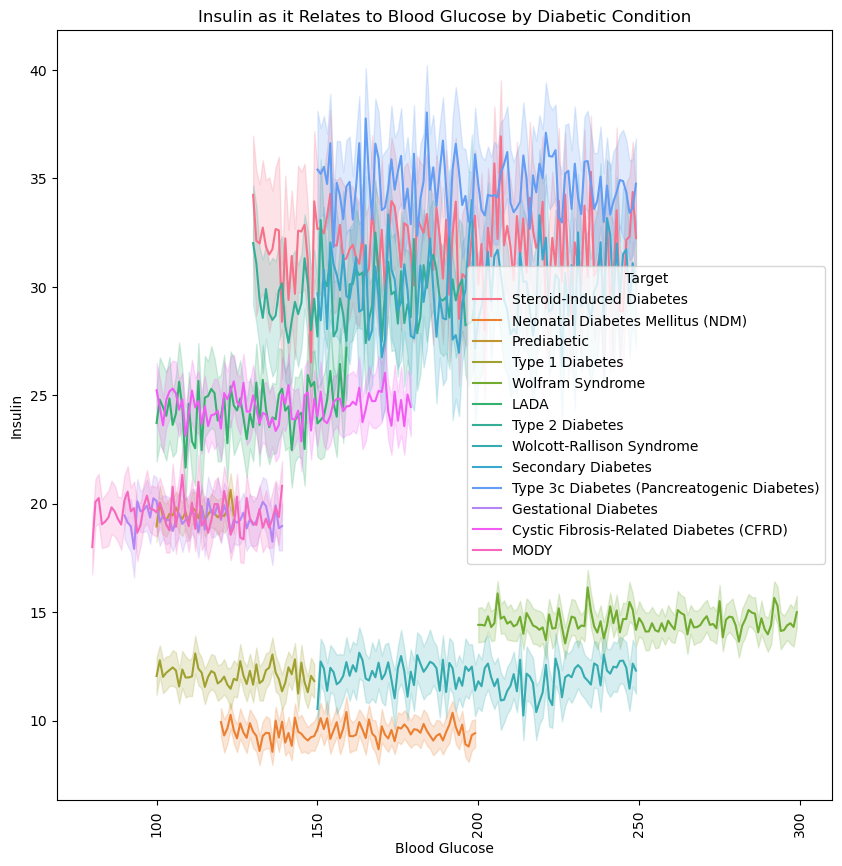

In [104]:
plt.figure(figsize=(10,10))
sns.lineplot(data=data, x='Blood Glucose Levels', y='Insulin Levels', hue = 'Target', legend=True)


plt.title('Insulin as it Relates to Blood Glucose by Diabetic Condition')
plt.xlabel('Blood Glucose')
plt.ylabel('Insulin')
plt.xticks(rotation=90)
plt.show()

## Observations:
This is a list of significant findings from the graph by diabetes type. 

-Steriod Induced Diabetes: Steroids (glucocorticoid drugs) contribute to high blood glucose levels, naturally resulting in increased insulin levels to control glucose levels. 

-Neonatal Diabetes: This type of diabetes occurs in premature babies without a fully developed pancreas. This explains the low insulin level and high glucose level. 

-Prediabetic: Prediabetes is due to consuming too much glucose, and the body produces higher levels of insulin to compensate. 

-Type 1: Type one diabetes is a genetic insulin deficiency. Independent of glucose consumption, the low amount of insulin produced cannot accomodate the higher levels of blood glucose. 

-Gestational Diabetes: Similar to prediabetes, gestational diabetes is a result of consuming too much glucose during pregnancy, and insulin levels increase to control blood glucose levels. 

-Type 2: In type 2 diabetetics, long-term overconsumption of glucose results in insulin-resistance, which explains the high blood glucose and high insulin levels. 

### Presence of Autoantibodies Diabetes 

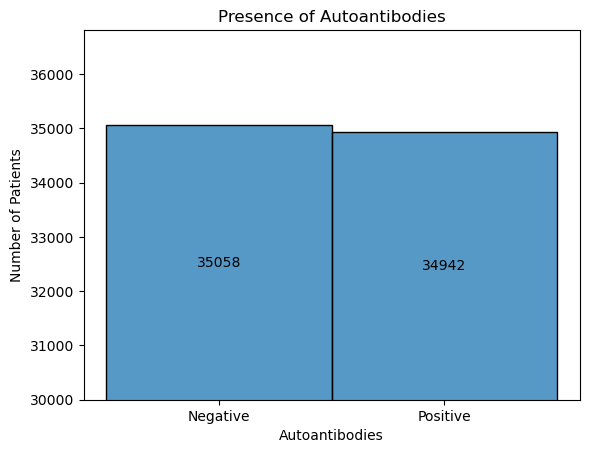

In [103]:
graph = sns.histplot(data=data, x='Autoantibodies')
plt.ylabel("Number of Patients")
plt.ylim(30000)
plt.title("Presence of Autoantibodies")
for container in graph.containers:
    graph.bar_label(container, label_type='center')
plt.show()

### Measuring How Many Patients of Each Diabetic Condition are Present in the Data

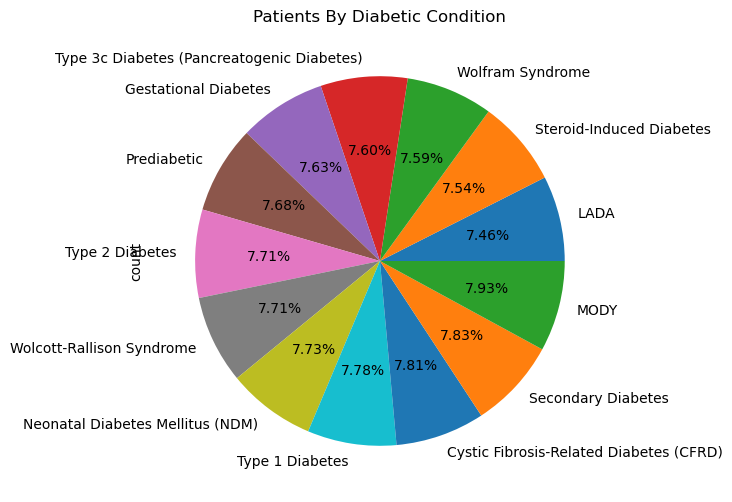

In [12]:
data['Target'].value_counts().sort_values(ascending=True)\
.plot(kind='pie',figsize=(9,6),title="Patients By Diabetic Condition",
    autopct='%1.2f%%')
plt.show()

### Observing How Age Influences BMI

Text(0, 0.5, 'BMI')

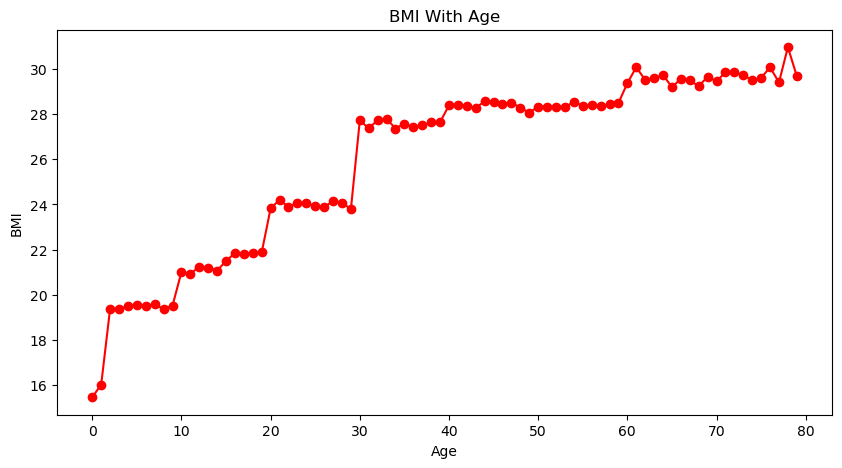

In [100]:
bmi_by_age = data.groupby('Age')['BMI'].mean()

bmi_by_age.plot(kind='line',figsize=(10,5), marker='o',color='red')
plt.title('BMI With Age')
plt.ylabel("BMI")

### Observations:
- In the bar graph, it is reenforced that half the diabetic conditions in the dataset are autoimmune in nature and have autoantibodies present. 

- The piechart displays the distribution of patients with the included conditions within the study. The chart shows an evidently even distribution of people with each diabetic condition. 

- In the linegraph, there is a clear upward trend of BMI as age increases. BMI is a leading risk factor in adult onset diabetes. From this we can infer that with age, the risk of developing diabetes increases. 

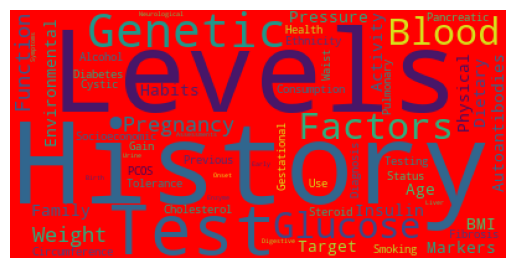

In [14]:
words = ' '.join(data)
wordcloud = WordCloud(mode='RGB',background_color='red').generate(words)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

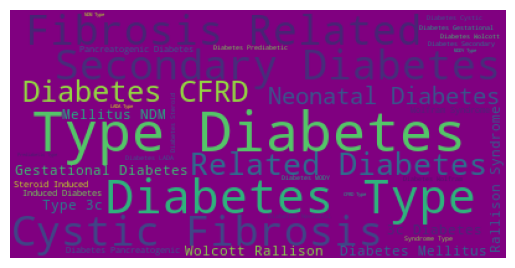

In [15]:
words2 = ' '.join(data['Target'])
wordcloud2 = WordCloud(mode='RGB',background_color='purple').generate(words2)

plt.imshow(wordcloud2)
plt.title('')
plt.axis("off")
plt.show()

### Conclusion:


With these analyses, key insights about diabetic condition include age, insulin levels, glucose levels, and bmi being key factors. Some conditions like type 2 involve higher levels of insulin and insulin resistance, while conditions like type 1 involved insulin deficiencies. Overall diabeties is a spectrum of conditions and health factors, but overall exploring this data taught us the significance of viewing data through a bigger lense. 